In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
adult=pd.read_csv('adult.csv')

In [88]:
adult[adult.sex==' Female'].age.mean()

36.85823043357163

In [45]:
adult[adult.country==' Germany']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
122,30,Private,77143,Bachelors,13,Never-married,Exec-managerial,Own-child,Black,Male,0,0,40,Germany,<=50K
280,22,Private,34918,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,15,Germany,<=50K
767,22,Private,151790,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,Germany,<=50K
1009,26,Private,109186,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,Germany,<=50K
1142,59,Federal-gov,212448,HS-grad,9,Widowed,Sales,Unmarried,White,Female,0,0,40,Germany,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32074,30,Private,318749,Assoc-voc,11,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,35,Germany,<=50K
32101,45,Private,174794,Bachelors,13,Separated,Prof-specialty,Unmarried,White,Female,0,0,56,Germany,<=50K
32141,34,Private,193344,Some-college,10,Never-married,Adm-clerical,Unmarried,White,Female,0,0,40,Germany,<=50K
32236,26,Private,323044,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,Germany,>50K


In [66]:
adult[(adult.race==' Amer-Indian-Eskimo') & (adult.sex==' Male')].age.max()

82

In [76]:
adult=adult.rename({'education-num':'education_num','marital-status':'marital_status'},axis=1)

In [80]:
adult[adult['hours-per-week']==99].salary.value_counts()

 <=50K    60
 >50K     25
Name: salary, dtype: int64

In [84]:
a=adult.groupby(['country','salary']).agg({'hours-per-week':'mean'}).reset_index()

In [87]:
a[a.country==' Japan']

,country,salary,hours-per-week
47,Japan,<=50K,41.000000
48,Japan,>50K,47.958333


In [90]:
adult[adult.salary==' >50K'].age.describe()

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

In [91]:
adult.shape()

TypeError: 'tuple' object is not callable

In [94]:
adult.shape

(32561, 15)

In [133]:
titanic=pd.read_csv('titanic.csv')
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [120]:
titanic[titanic.Sex=='male'][['Name']].applymap(lambda x: x.split()[2]).value_counts()

Name   
William    35
John       25
George     14
Charles    13
Thomas     13
           ..
Hudson      1
Husein      1
Ignjac      1
Iisakki     1
hoef,       1
Length: 281, dtype: int64

In [131]:
titanic.groupby(['Pclass','Sex']).Age.mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [105]:
156/(228+156)

0.40625

In [107]:
5/22

0.22727272727272727

In [109]:
233/(233+81)

0.7420382165605095

In [111]:
109/(468+109)

0.18890814558058924

In [162]:
news=pd.read_csv('howpop_train.csv')

In [188]:
news.published=pd.to_datetime(news.published,format='%Y%m%d%h')

In [189]:
news['year']=pd.DatetimeIndex(news.published).year

In [190]:
news['month']=pd.DatetimeIndex(news.published).month

In [292]:
news['day']=pd.DatetimeIndex(news.published).date

In [293]:
news['hour']=pd.DatetimeIndex(news.published).hour

In [294]:
import seaborn as sns

In [295]:
news_mart=news[(news.year==2015)& (news.month==3)]

<AxesSubplot:xlabel='hour', ylabel='comments'>

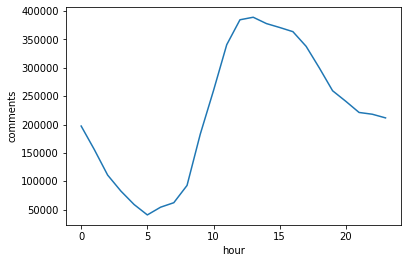

In [305]:
sns.lineplot(data=news.groupby(['hour']).agg({'comments':'sum'}),x='hour',y='comments')

In [304]:
news.groupby(['hour']).agg({'views':'sum'}).max()

views    177152709
dtype: int64

<AxesSubplot:xlabel='hour', ylabel='views'>

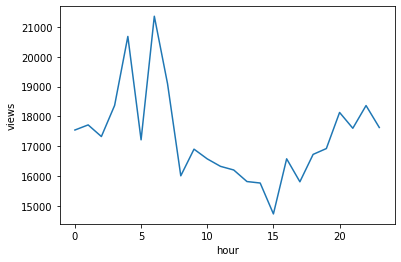

In [324]:
a=news.groupby(['hour']).agg({'views':'mean','comments':'mean'}).reset_index()
sns.lineplot(data=a,x='hour',y='views')

In [274]:
news[news.comments==news.comments.max()]


,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,day,hour,day_week
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,4,2,4


In [276]:
a

,hour,views,comments
0,0,71574141,197379
1,1,55793066,155617
2,2,39370785,110935
3,3,28620488,82767
4,4,22746228,59023
5,5,14653279,40692
6,6,22379317,54286
7,7,27457105,62213
8,8,40356336,92666
9,9,82958032,183048


In [264]:
news

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,day,hour,day_week
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,1,18,1
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,1,18,1
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,1,18,1
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,2,1,2
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,2,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134132,https://habrahabr.ru/company/mailru/blog/314014/,habrahabr.ru,314014,2016-10-31 21:45:00,NaN,develop,False,56033,Парсинг JSON — это минное поле,58,347,35500,164.0,6.0,2016,10,0,21,0
134133,https://geektimes.ru/post/282086/,geektimes.ru,282086,2016-10-31 22:44:00,@marks,NaN,False,5504,Заработала система раннего предупреждения НАСА...,52,16,12900,22.0,0.0,2016,10,0,22,0
134134,https://geektimes.ru/post/282090/,geektimes.ru,282090,2016-10-31 23:26:00,@Shapelez,NaN,False,2883,Арзамасский городской суд постановил заблокиро...,16,14,15800,28.0,4.0,2016,10,0,23,0
134135,https://geektimes.ru/post/282092/,geektimes.ru,282092,2016-10-31 23:52:00,@ragequit,NaN,False,5735,Медиа-коммуникационный союз планирует внести в...,47,14,15000,20.0,0.0,2016,10,0,23,0


In [281]:
authors=news.groupby('author').agg({'post_id':'nunique','votes_minus':'sum'})

In [309]:
a=authors.sort_values(by='post_id', ascending=False).reset_index()

In [311]:
a['freq']=a.votes_minus/a.post_id

In [313]:
a.head(20)

,author,post_id,votes_minus,freq
0,@alizar,5291,41734.0,7.887734
1,@marks,4711,18059.0,3.833369
2,@SLY_G,1938,8293.0,4.279154
3,@ivansychev,1350,3373.0,2.498519
4,@semen_grinshtein,1171,1367.0,1.167378
5,@jeston,1060,5117.0,4.827358
6,@aleksandrit,633,6294.0,9.943128
7,@XaocCPS,603,9111.0,15.109453
8,@Mithgol,559,11367.0,20.334526
9,@Mordatyj,546,4057.0,7.430403


In [321]:
news_2=news.loc[(news.day_week==5) | (news.day_week==0)]

<AxesSubplot:xlabel='hour', ylabel='post_id'>

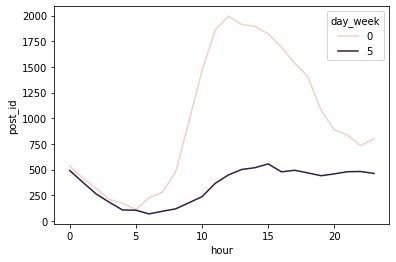

In [322]:
sns.lineplot(data=news_2.groupby(['hour','day_week']).agg({'post_id':'nunique'}),x='hour',y='post_id',hue='day_week')

In [320]:
news

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [330]:
from sklearn.manifold import TSNE
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


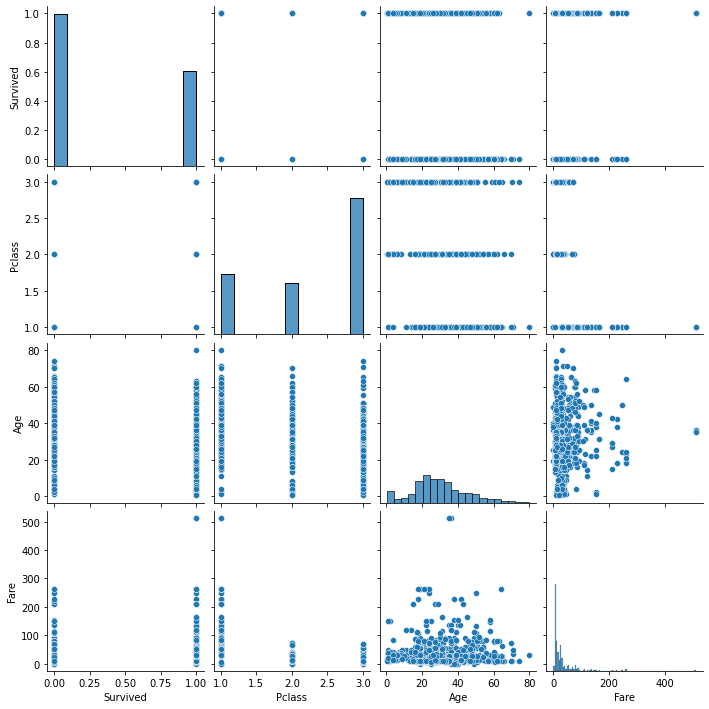

In [333]:
sns.pairplot(titanic[['Survived','Pclass','Sex','Age','Fare']])

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

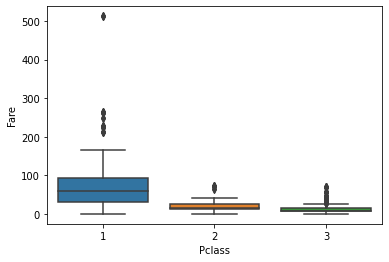

In [335]:
sns.boxplot(data=titanic,x='Pclass',y="Fare")
titan

In [340]:
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [341]:
titanic_train=titanic[titanic.groupby('Pclass')['Fare'].apply(lambda x:x<=(x.mean()+2*x.describe()['std']))]

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

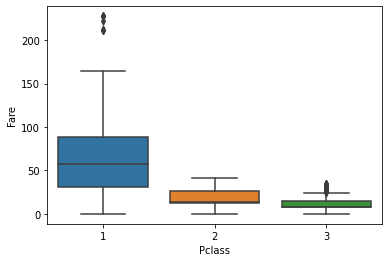

In [342]:
sns.boxplot(data=titanic_train,x='Pclass',y="Fare")

<AxesSubplot:xlabel='Survived', ylabel='count'>

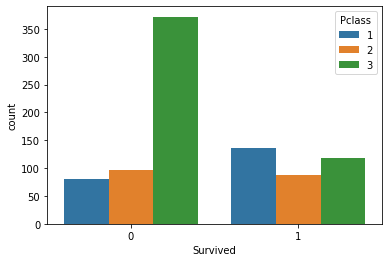

In [345]:
sns.countplot(data=titanic,x='Survived',hue='Pclass')

In [348]:
titanic_age=titanic.loc[(titanic.Age<30) | (titanic.Age>60)]

In [350]:
titanic_age['old']=titanic_age.Age>60

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [351]:
titanic_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,old
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,False
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,False
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False


<AxesSubplot:xlabel='old', ylabel='count'>

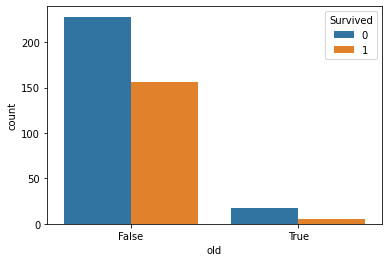

In [352]:
sns.countplot(data=titanic_age,x='old',hue='Survived')